In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [59]:
df = pd.read_csv('nyc_birds.csv')

In [60]:
df.head()

,GLOBAL UNIQUE IDENTIFIER,CATEGORY,COMMON NAME,OBSERVATION_COUNT,LATITUDE,LONGITUDE,OBSERVATION_DATE,MONTH,YEAR,OBSERVER ID,DURATION MINUTES,NUMBER OBSERVERS,TRIP COMMENTS,SPECIES COMMENTS,APPROVED
0,URN:CornellLabOfOrnithology:EBIRD:OBS786503632,species,Northern Cardinal,1,40.741895,-73.989308,1880-10-23,10,1880,obsr1385587,NaN,NaN,NaN,NaN,1
1,URN:CornellLabOfOrnithology:EBIRD:OBS786499692,species,Least Sandpiper,1,40.741895,-73.989308,1881-05-14,5,1881,obsr1385587,NaN,NaN,NaN,NaN,1
2,URN:CornellLabOfOrnithology:EBIRD:OBS786503672,species,Barn Swallow,1,40.741895,-73.989308,1884-05-16,5,1884,obsr1385587,NaN,NaN,NaN,NaN,1
3,URN:CornellLabOfOrnithology:EBIRD:OBS786503655,species,Carolina Wren,1,40.741895,-73.989308,1884-05-13,5,1884,obsr1385587,NaN,NaN,NaN,NaN,1
4,URN:CornellLabOfOrnithology:EBIRD:OBS786503665,species,Red-winged Blackbird,1,40.741895,-73.989308,1884-05-01,5,1884,obsr1385587,NaN,NaN,NaN,NaN,1


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699064 entries, 0 to 1699063
Data columns (total 15 columns):
GLOBAL UNIQUE IDENTIFIER    object
CATEGORY                    object
COMMON NAME                 object
OBSERVATION_COUNT           int64
LATITUDE                    float64
LONGITUDE                   float64
OBSERVATION_DATE            object
MONTH                       int64
YEAR                        int64
OBSERVER ID                 object
DURATION MINUTES            float64
NUMBER OBSERVERS            float64
TRIP COMMENTS               object
SPECIES COMMENTS            object
APPROVED                    int64
dtypes: float64(4), int64(4), object(7)
memory usage: 194.4+ MB


In [62]:
df.isna().sum()

GLOBAL UNIQUE IDENTIFIER          0
CATEGORY                          0
COMMON NAME                       0
OBSERVATION_COUNT                 0
LATITUDE                          0
LONGITUDE                         0
OBSERVATION_DATE                  0
MONTH                             0
YEAR                              0
OBSERVER ID                       0
DURATION MINUTES             117453
NUMBER OBSERVERS              41420
TRIP COMMENTS               1015914
SPECIES COMMENTS            1464129
APPROVED                          0
dtype: int64

# Further Data Cleaning: Dealing with Missing Data

**Number Observers:** We can see that there are 41420 missing values for this feature. Since the median is 1 obeserver, it is safe to assume that any observation must have had at least 1 observer present. We will default to 1 for missing values.

In [64]:
#The median is 1
df['NUMBER OBSERVERS'].median()

1.0

In [66]:
df['NUMBER OBSERVERS'].isna().sum()

41420

In [67]:
df.groupby(['NUMBER OBSERVERS'])['COMMON NAME'].value_counts()

NUMBER OBSERVERS  COMMON NAME             
1.0               House Sparrow               54784
                  American Robin              43459
                  European Starling           43324
                  Rock Pigeon                 41264
                  Blue Jay                    39609
                  White-throated Sparrow      35820
                  Northern Cardinal           34172
                  Mourning Dove               32007
                  Mallard                     31488
                  Common Grackle              25715
                  Canada Goose                24862
                  Gray Catbird                20692
                  Red-bellied Woodpecker      20631
                  Song Sparrow                17601
                  Downy Woodpecker            17586
                  Ring-billed Gull            17051
                  Herring Gull                16548
                  Red-tailed Hawk             16308
                  Dou

In [68]:
df['NUMBER OBSERVERS'] = df['NUMBER OBSERVERS'].fillna(1)

In [69]:
#
df.isna().sum()

GLOBAL UNIQUE IDENTIFIER          0
CATEGORY                          0
COMMON NAME                       0
OBSERVATION_COUNT                 0
LATITUDE                          0
LONGITUDE                         0
OBSERVATION_DATE                  0
MONTH                             0
YEAR                              0
OBSERVER ID                       0
DURATION MINUTES             117453
NUMBER OBSERVERS                  0
TRIP COMMENTS               1015914
SPECIES COMMENTS            1464129
APPROVED                          0
dtype: int64

**Duration Minutes**: There are 117453 missing values. I want to check if most of the data for this feature began being captured before or after advent of smartphones before making a determination about how to handle. If it is just after 2005, then all analysis with this feature will be on recent data only.

In [70]:
#Median viewing lasts 105 minutes
df['DURATION MINUTES'].median()

105.0

In [71]:
#review count of each duration minutes column per year
#There are more recordings for this feature
df.groupby(df['YEAR'])['DURATION MINUTES'].count()

YEAR
1880         0
1881         0
1884         0
1885         0
1886         0
1887         0
1888         0
1903         0
1911         0
1912         2
1914         0
1921         0
1922         1
1923         4
1924         0
1925       241
1927         0
1928         0
1930         0
1931         0
1935         0
1938         0
1942         0
1943         0
1947         0
1948         0
1949         0
1950         0
1952         0
1953         0
         ...  
1991       622
1992       791
1993       939
1994       372
1995       561
1996       887
1997       878
1998       279
1999       373
2000       723
2001       473
2002       615
2003      2099
2004      2880
2005      5902
2006      5709
2007      7805
2008     11956
2009     14746
2010     31633
2011     53189
2012     75551
2013    111017
2014    136361
2015    146576
2016    166655
2017    203819
2018    251632
2019    297951
2020     45685
Name: DURATION MINUTES, Length: 93, dtype: int64

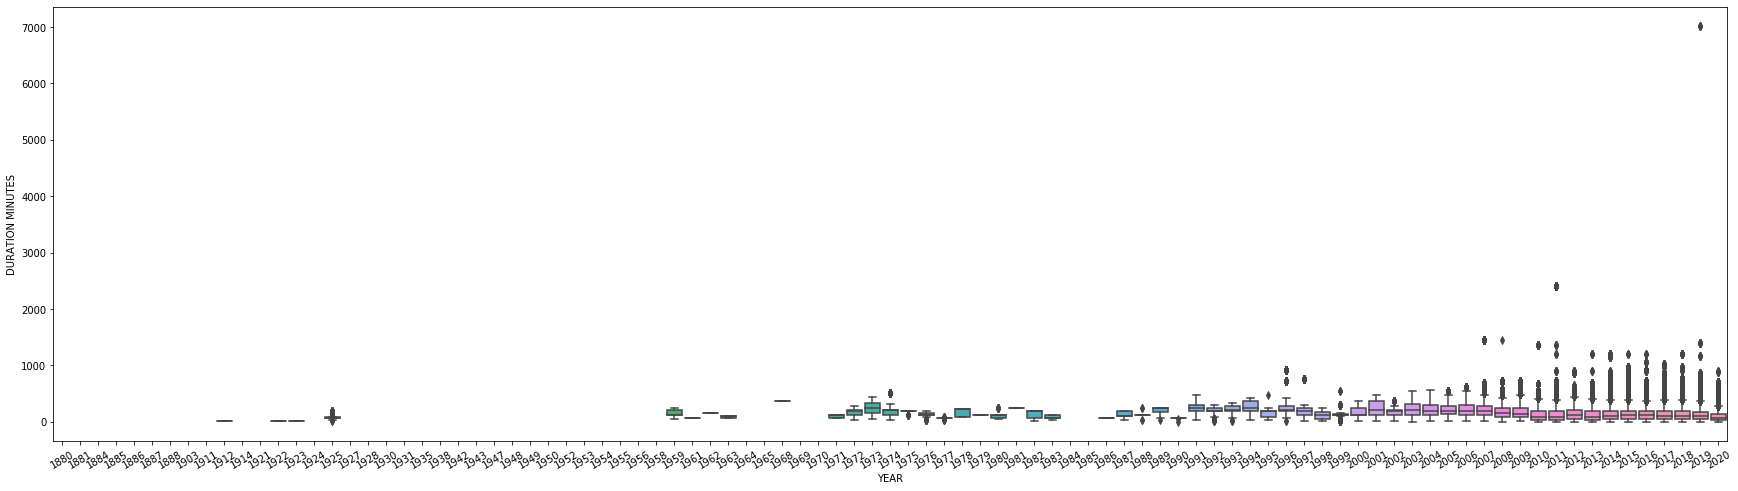

In [41]:
import seaborn as sns

fig_dims = (30, 8)
fig, ax = plt.subplots(figsize=fig_dims)

g = sns.boxplot(x=df['YEAR'], y=df['DURATION MINUTES'], ax=ax)
g.set_xticklabels(g.get_xticklabels(),rotation=30)
plt.show()

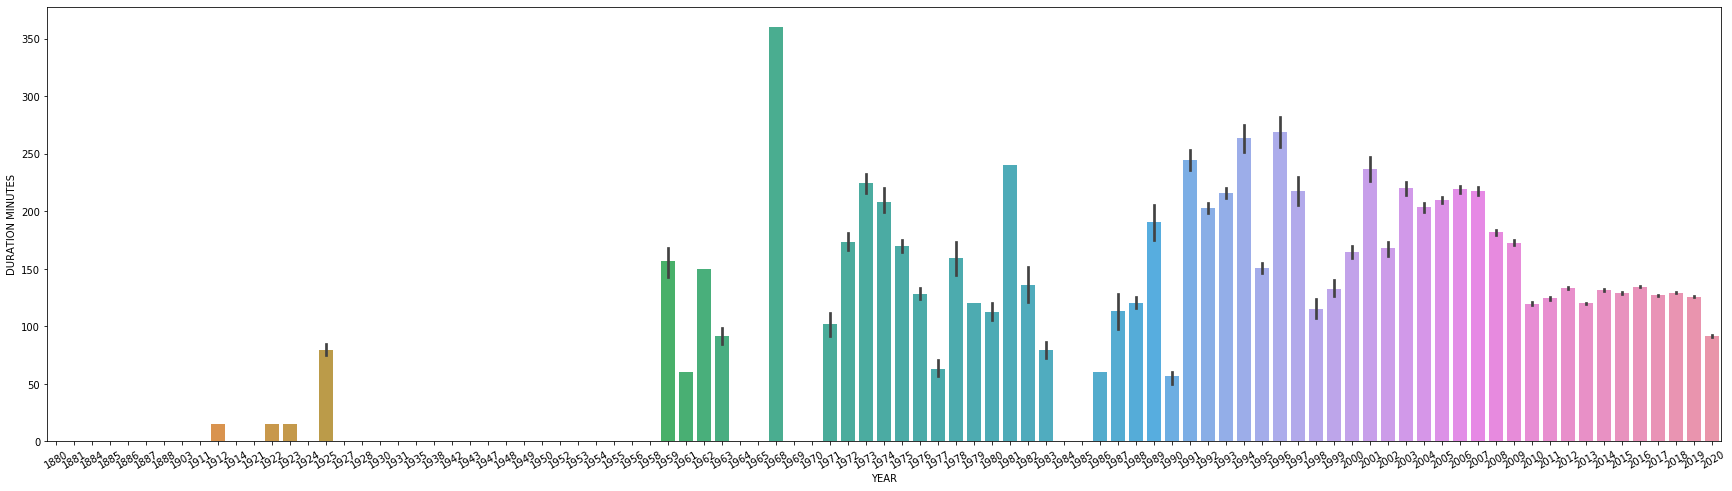

In [74]:
import seaborn as sns

fig_dims = (30, 8)
fig, ax = plt.subplots(figsize=fig_dims)

g = sns.barplot(x=df['YEAR'], y=df['DURATION MINUTES'], ax=ax)
g.set_xticklabels(g.get_xticklabels(),rotation=30)
plt.show()

In [79]:
#Reviewing the issue in 1968. 
#Looks like there were only 15 recordings

print(df.groupby(df['YEAR'] == 1968)['DURATION MINUTES'].count())
print(df.groupby(df['YEAR']==1986)['DURATION MINUTES'].unique())

YEAR
False    1581596
True          15
Name: DURATION MINUTES, dtype: int64
YEAR
False    [nan, 15.0, 45.0, 5.0, 40.0, 30.0, 70.0, 60.0,...
True                                           [nan, 60.0]
Name: DURATION MINUTES, dtype: object


In [109]:
df['DURATION MINUTES'] = df['DURATION MINUTES'].fillna(df['DURATION MINUTES'].median())

# Visualizations Continued:

In [110]:
df.groupby(['MONTH']).count()['OBSERVATION_COUNT']

MONTH
1     102027
2      74718
3     111904
4     270552
5     474736
6      51364
7      32707
8      59546
9     163603
10    188123
11     95095
12     74689
Name: OBSERVATION_COUNT, dtype: int64

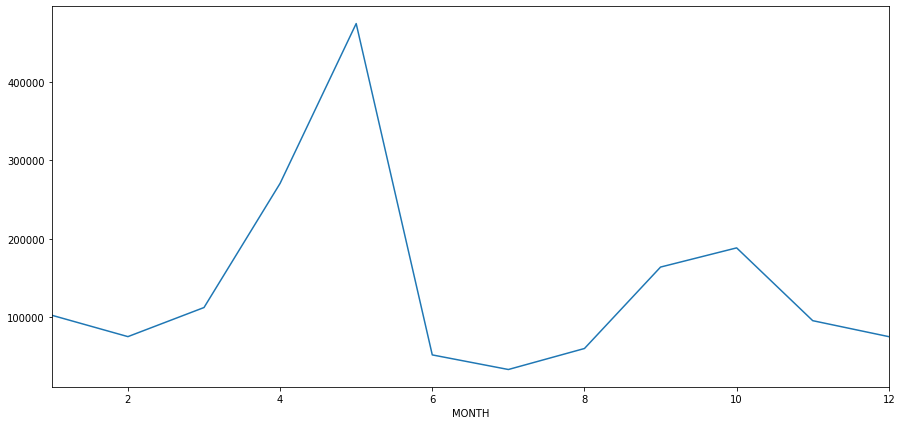

In [111]:
#Review the monthly total observation counts
fig, ax = plt.subplots(figsize=(15,7))

df.groupby(['MONTH']).count()['OBSERVATION_COUNT'].plot(ax=ax)

**Plotting two continuous variables**


In [112]:
df.head()

,GLOBAL UNIQUE IDENTIFIER,CATEGORY,COMMON NAME,OBSERVATION_COUNT,LATITUDE,LONGITUDE,OBSERVATION_DATE,MONTH,YEAR,OBSERVER ID,DURATION MINUTES,NUMBER OBSERVERS,TRIP COMMENTS,SPECIES COMMENTS,APPROVED
0,URN:CornellLabOfOrnithology:EBIRD:OBS786503632,species,Northern Cardinal,1,40.741895,-73.989308,1880-10-23,10,1880,obsr1385587,105.0,1.0,NaN,NaN,1
1,URN:CornellLabOfOrnithology:EBIRD:OBS786499692,species,Least Sandpiper,1,40.741895,-73.989308,1881-05-14,5,1881,obsr1385587,105.0,1.0,NaN,NaN,1
2,URN:CornellLabOfOrnithology:EBIRD:OBS786503672,species,Barn Swallow,1,40.741895,-73.989308,1884-05-16,5,1884,obsr1385587,105.0,1.0,NaN,NaN,1
3,URN:CornellLabOfOrnithology:EBIRD:OBS786503655,species,Carolina Wren,1,40.741895,-73.989308,1884-05-13,5,1884,obsr1385587,105.0,1.0,NaN,NaN,1
4,URN:CornellLabOfOrnithology:EBIRD:OBS786503665,species,Red-winged Blackbird,1,40.741895,-73.989308,1884-05-01,5,1884,obsr1385587,105.0,1.0,NaN,NaN,1


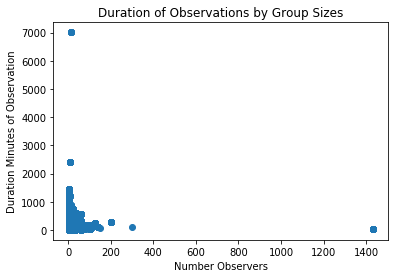

In [115]:
# Basic scatter plot, log scale
plt.scatter(df['NUMBER OBSERVERS'], df['DURATION MINUTES'])

# Strings
xlab = 'Number Observers'
ylab = 'Duration Minutes of Observation'
title = 'Duration of Observations by Group Sizes'

# Add axis labels
plt.xlabel(xlab)
plt.ylabel(ylab)

# Add title
plt.title(title)

# After customizing, display the plot
plt.show()

In [116]:
#Looks like there are some pretty serious outliers in the graph above.